<a href="https://colab.research.google.com/github/gonzoreyes07/Simulaci-n-1/blob/main/M%C3%A9todo_Acep_y_Rech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [ ]:
# Definimos los parámetros de la distribución triangular
a = 1  # Valor mínimo
c = 3  # Moda
b = 5  # Valor máximo
n = 10000  # Número de muestras

In [3]:
# Función de densidad de probabilidad (PDF) para la distribución triangular
def triangular_pdf(x, a, c, b):
    if x < a or x > b:
        return 0
    elif a <= x < c:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif x == c:
        return 2 / (b - a)
    elif c < x <= b:
        return 2 * (b - x) / ((b - a) * (b - c))
    return 0

In [4]:
# Función de distribución acumulada (CDF) para la distribución triangular
def triangular_cdf(x, a, c, b):
    if x < a:
        return 0
    elif a <= x <= c:
        return (x - a)**2 / ((b - a) * (c - a))
    elif c < x <= b:
        return 1 - (b - x)**2 / ((b - a) * (b - c))
    else:
        return 1

In [6]:
# Método de aceptación y rechazo
def triangular(a, c, b, n):
    x = []  # Lista para guardar los números generados
    # Densidad de la distribución uniforme envolvente
    g_x = 1 / (b - a)
    # Máximo de la PDF triangular (en x=c)
    f_max = 2 / (b - a)
    # Constante M = f(x)/g(x) en el máximo
    M = f_max / g_x

    while len(x) < n:
        # Generamos una distribución x ~ Uniforme(a, b)
        x_propuesta = a + (b - a) * random()
        # Generamos u ~ Uniforme(0, 1)
        u = random()
        # Calculo f(x)/Mg(x) para la condición de aceptación
        if u * M * g_x <= triangular_pdf(x_propuesta, a, c, b):
            x.append(x_propuesta)

    return np.array(x)

In [7]:
# Generamos nuestras muestras
np.random.seed(42)
muestras = triangular(a, c, b, n)

# Calculo estadísticas muestrales
mediamuestral = np.mean(muestras)
desvmuestral = np.std(muestras)

# Calculo valores teóricos
mediareal = (a + c + b) / 3
varreal = (a**2 + c**2 + b**2 - a*c - a*b - c*b) / 18
desvreal = np.sqrt(varreal)

print(f"Media muestral: {mediamuestral:.4f}")
print(f"Media teórica: {mediareal:.4f}")
print(f"Desviación estándar muestral: {desvmuestral:.4f}")
print(f"Desviación estándar teórica: {desvreal:.4f}")

Media muestral: 2.9922
Media teórica: 3.0000
Desviación estándar muestral: 0.8151
Desviación estándar teórica: 0.8165


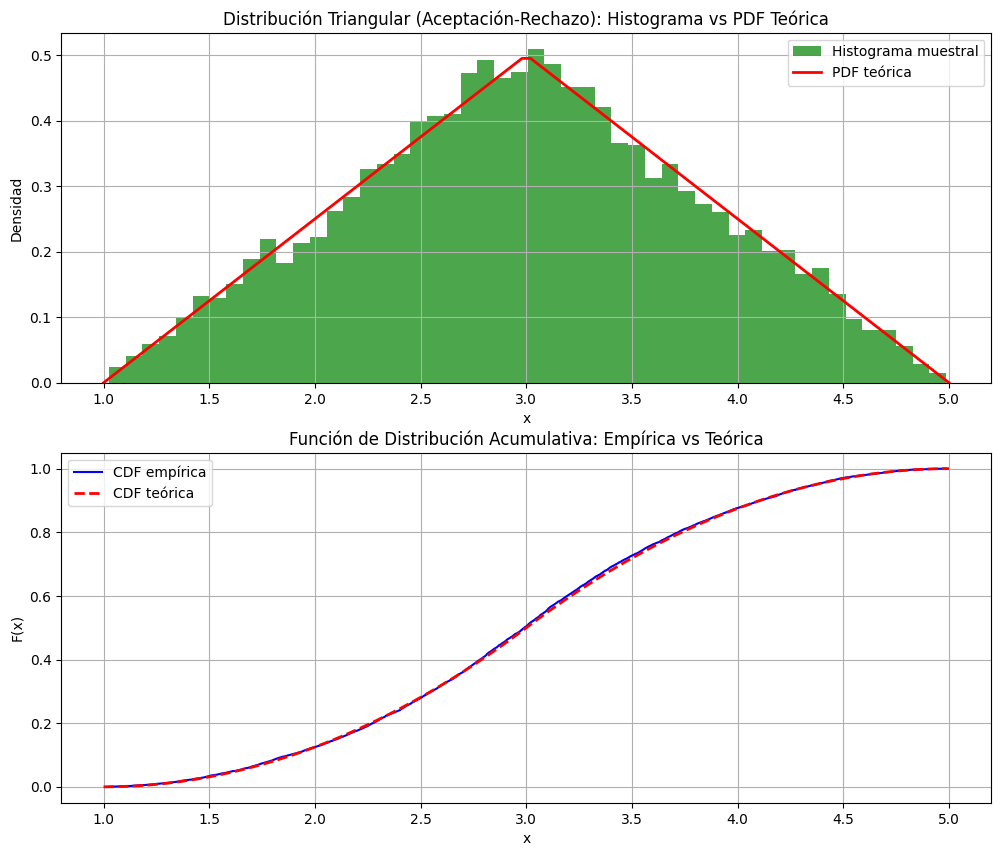

In [8]:
# Creamos una figura con dos subgráficos
plt.figure(figsize=(12, 10))

# Subgráfico 1: Histograma con PDF teórica
plt.subplot(2, 1, 1)
plt.hist(muestras, bins=50, density=True, alpha=0.7, color='green', label='Histograma muestral')

# PDF teórica
x = np.linspace(a, b, 100)
pdf = [triangular_pdf(xi, a, c, b) for xi in x]
plt.plot(x, pdf, 'r-', lw=2, label='PDF teórica')
plt.title('Distribución Triangular (Aceptación-Rechazo): Histograma vs PDF Teórica')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

# Subgráfico 2: CDF empírica vs teórica
plt.subplot(2, 1, 2)
datos_ordenados = np.sort(muestras)
cdf_empirica = np.arange(1, len(datos_ordenados) + 1) / len(datos_ordenados)
plt.plot(datos_ordenados, cdf_empirica, 'b-', label='CDF empírica')

# CDF teórica
cdf_teorica = [triangular_cdf(xi, a, c, b) for xi in x]
plt.plot(x, cdf_teorica, 'r--', lw=2, label='CDF teórica')
plt.title('Función de Distribución Acumulativa: Empírica vs Teórica')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()